In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# for geojson processing
import geopandas as gpd
from shapely.geometry import Point, Polygon

#import js for using d3 library
from notebookjs import execute_js

In [2]:
year = 2018
data_population = pd.read_csv(r"people_{}.txt".format(year), sep='\t', index_col=0)
print("Number of households:", data_population['sp_hh_id'].unique().shape[0])
data_population.head()

Number of households: 81379


,sp_id,sp_hh_id,age,sex,factor_age
0,2307978.0,2.0,14.0,F,2
1,2307979.0,8.0,14.0,F,2
2,2307980.0,10.0,14.0,F,2
3,2375651.0,10.0,17.0,F,3
4,2431614.0,18.0,20.0,F,4


In [3]:
df_households = pd.read_csv("households.txt", sep='\t', index_col = 0)
df_households.iloc[1000]
# df_households['sp_id'].unique().shape
df_households.head()


,sp_id,latitude,longitude
0,2,59.648124,30.386215
1,3,59.648943,30.384949
2,4,59.649029,30.384652
3,5,59.649388,30.383871
4,6,59.649807,30.381786


In [4]:
def get_MO_by_coord():
    pass

Нарисуем карту Санкт-Петербурга с административными делениями в виде муниципальных образований. Всего их на 2023 год 111 штук. Считываем файл *MO_SPB.geojson*

In [5]:
geo_df = gpd.read_file("MO_SPB.geojson")

latitudes = df_households['latitude'].to_numpy()
longitudes = df_households['longitude'].to_numpy()

hh_coords = [Point((lon, lat)) for lat, lon in zip(latitudes, longitudes)]
hh_coords_geo_series = gpd.GeoSeries(hh_coords, crs={'init': 'epsg:4326'})


/home/andrey/.local/lib/python3.10/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


<Axes: >

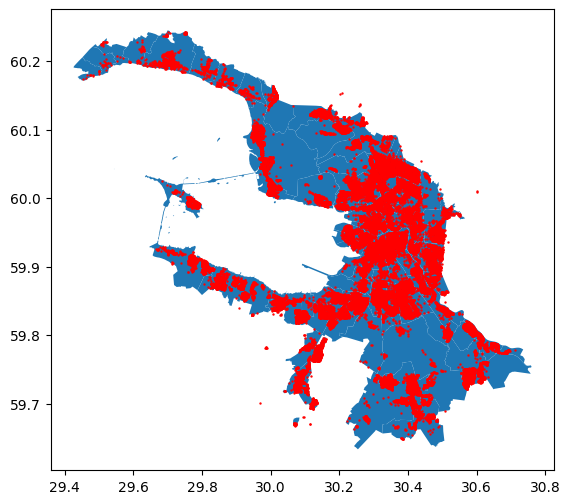

In [6]:
fig, ax = plt.subplots(figsize=(6.5, 6.5))
geo_df.plot(ax=ax)
hh_coords_geo_series.plot(ax=ax, color='red', markersize=0.5)

Теперь проведем верификацию путем сравнения количества людей в соответствующем муниципальном образовании согласно файлу *people_2010.txt" и согласно данным с сайта Петростата.\\
https://78.rosstat.gov.ru/folder/27595 - данные только с 2018 года!!!

In [7]:
latitudes = df_households['latitude'].to_numpy()
longitudes = df_households['longitude'].to_numpy()

len(hh_coords)
hh_id_array = data_population['sp_hh_id'].unique()

data_hh_occurency = data_population.groupby(['sp_hh_id']).size()
data_hh_occurency


population_MO = []
for index_MO in range(len(geo_df)):
    population_MO_counter = 0
    polygon = geo_df['geometry'].iloc[index_MO]
    for index_hh in range(len(hh_coords)):
        population_MO_counter+=(polygon.contains(hh_coords[index_hh]) * data_hh_occurency.iloc[index_hh])
    population_MO.append(population_MO_counter)

population_MO

[45208,
 18999,
 30170,
 33913,
 32523,
 28268,
 71167,
 48443,
 41639,
 9707,
 21406,
 40673,
 112294,
 23505,
 7520,
 5704,
 47043,
 54850,
 68834,
 45721,
 27297,
 44098,
 8295,
 9558,
 82457,
 47874,
 84377,
 37670,
 52880,
 8842,
 6905,
 39882,
 47572,
 32890,
 47923,
 45208,
 22368,
 33491,
 51860,
 39301,
 188012,
 73027,
 61380,
 49132,
 58910,
 68451,
 30926,
 72370,
 35255,
 20905,
 56957,
 40584,
 34145,
 22717,
 19019,
 14741,
 26934,
 21967,
 25454,
 22856,
 30383,
 35304,
 38219,
 113288,
 68336,
 99517,
 33308,
 36787,
 61448,
 101076,
 53929,
 31956,
 27599,
 51027,
 21570,
 34854,
 30341,
 15925,
 85661,
 125997,
 25255,
 65014,
 41212,
 60551,
 91660,
 123069,
 11445,
 154711,
 69451,
 57837,
 61159,
 39128,
 14678,
 103831,
 152748,
 5051,
 1711,
 67906,
 28626,
 140447,
 7494,
 18886,
 1012,
 996,
 1560,
 10952,
 175284,
 8067,
 44577,
 2840,
 34831]

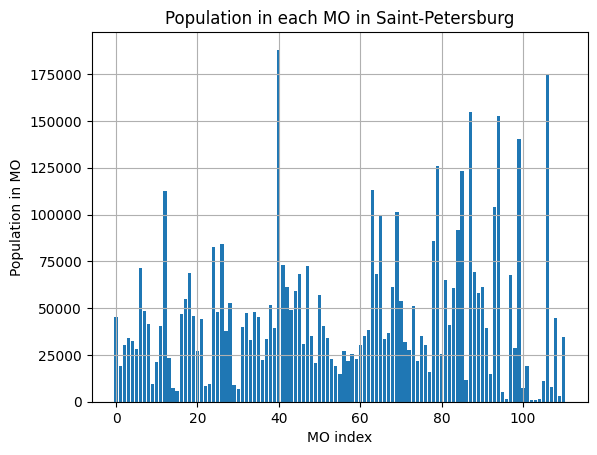

In [8]:
MO_index_array = [MO_index for MO_index in range(len(population_MO))]
plt.bar(MO_index_array, population_MO)
plt.title("Population in each MO in Saint-Petersburg")
plt.xlabel("MO index")
plt.ylabel("Population in MO")
plt.grid(True)

Теперь возьмем информацию о населении в каждом отдельном муниципальном образовании: \
https://78.rosstat.gov.ru/storage/mediabank/%D0%A1%D0%9F%D0%B1+%D1%87%D0%B8%D1%81%D0%BB+%D0%BD%D0%B0+01.01.2018+%D0%BF%D0%BE+%D0%9C%D0%9E+%D0%B2+%D1%87%D0%B5%D0%BB.pdf \
В файле *population_MO_2018.csv* приведена таблица с данными количества людей для каждого МО в 2018 году

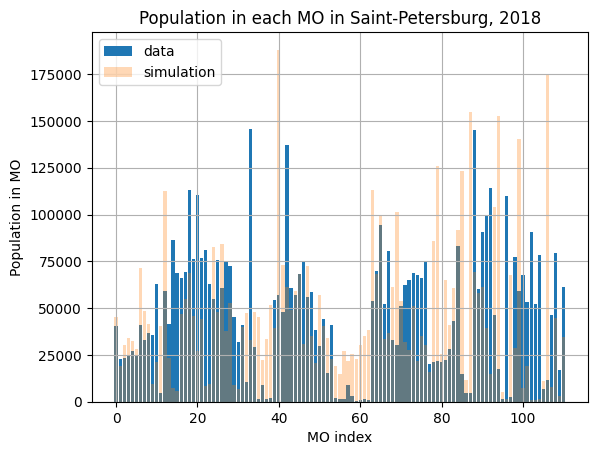

In [31]:
population_MO_official_data = pd.read_csv(r'population_MO_{}.csv'.format(year))

population_MO_official_data_array = population_MO_official_data[' MO_population'].to_numpy()


plt.bar(MO_index_array, population_MO_official_data_array)
plt.bar(MO_index_array, population_MO, alpha = 0.3)
plt.title("Population in each MO in Saint-Petersburg, 2018")
plt.xlabel("MO index")
plt.ylabel("Population in MO")
plt.legend(['data', 'simulation'])
plt.grid(True)


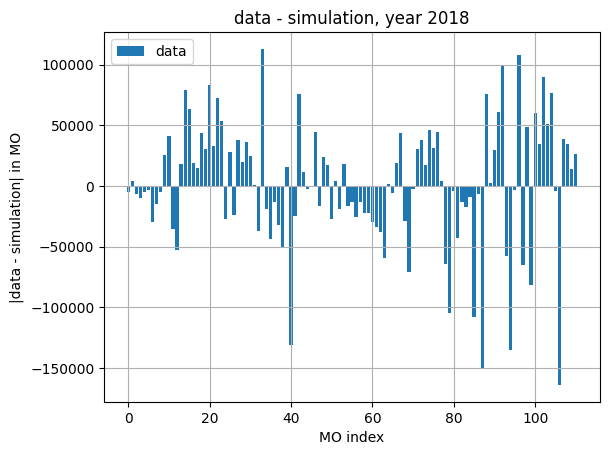

In [30]:
plt.bar(MO_index_array, (population_MO_official_data_array-population_MO))
plt.title("data - simulation, year 2018")
plt.xlabel("MO index")
plt.ylabel("|data - simulation| in MO")
plt.legend(['data', 'simulation'])
plt.grid(True)